**Pengurutan Tim Liga Inggris Berdasarkan Jumlah Gelar juara premier league dengan pendekatan itteratif dan rekursif**

In [126]:
import time
import json
import requests
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from enum import auto, Enum

In [127]:
url = "https://raw.githubusercontent.com/Sleepy4k/python-tugas-besar-aka/refs/heads/main/league_champs.json"
response = requests.get(url)
data = response.json()

# Only for local testing
# with open("league_champs.json", "r") as file:
#   data = json.load(file)

In [128]:
# Inisialisasi variable untuk menyimpan data
n_list = []
recursive_time_list = []
iterative_time_list = []

# Inisialisasi table dari fungsi construct pada library PrettyTable
table = PrettyTable()

# Mengisi header dari table sehingga lebih informatif
table.field_names = ["n", "Waktu Rekursif (s)", "Waktu Iteratif (s)"]

In [129]:
class JenisSort(Enum):
  """
  Membuat enum untuk menentukan jenis algoritma sorting yang akan digunakan
  sehingga program dapat menentukan jenis algoritma sorting yang akan digunakan
  @param ITERATIF: algoritma sorting dengan pendekatan iteratif
  @param REKURSIF: algoritma sorting dengan pendekatan rekursif
  """

  ITERATIF = auto()
  REKURSIF = auto()

In [130]:
def create_graph():
  """
  Membuat fungsi untuk membuat grafik dari data yang diberikan
  dengan menggunakan library matplotlib untuk visualisasi data
  performa algoritma sorting dari merge dan bubble sort
  """

  plt.figure(figsize=(10, 6))
  plt.plot(n_list, recursive_time_list, label='Rekursif', marker='o', linestyle='-')
  plt.plot(n_list, iterative_time_list, label='Iteratif', marker='o', linestyle='-')
  plt.title('Grafik Performa Antara Rekursif dan Iteratif')
  plt.xlabel('Jumlah Team (n)')
  plt.ylabel('Waktu Eksekusi (seconds)')
  plt.legend()
  plt.grid(True)
  plt.show()

In [131]:
def create_table():
  """
  Prosedur untuk membuat tabel dari data yang diberikan
  dengan menggunakan library prettytable untuk visualisasi data
  Waktu eksekusi dari algoritma sorting dari merge dan bubble sort
  """

  # mencari jumlah list terkecil dari list input, rekursif, dan iteratif
  # sehingga proses mencetak table tidak terjadi bug atau error
  min_len = min(len(n_list), len(recursive_time_list), len(iterative_time_list))

  # Melakukan perulangan dari 0 hingga n, dimana n adalah jumlah minimal
  # yang sudah ditentukan
  for i in range(min_len):
    # menambahkan baris dari nilai yang berada pada indeks ke i, dimana
    # nilai dari i didapat dari nilai perulangan yang dilakukan
    table.add_row([n_list[i], f"{recursive_time_list[i]:.7f}", f"{iterative_time_list[i]:.7f}"])

  # Mencetak table yang sudah dibuat
  print(table)

In [132]:
def bubble_sort(teams):
  """
  Membuat fungsi sorting dengan pendekatan iteratif menggunakan metode bubble sort
  @param teams: list team yang akan diurutkan
  @return: list team yang telah diurutkan
  """

  # N = jumlah data dari list yang diberikan
  # dimana data N akan menjadi batas iterasi luar
  n = len(teams)

  # Melakukan pengecekan apakah nilai N bernilai 0 atau kosong
  # jika data teams kosong, maka kembalikan nilai list kosong
  if n == 0:
    return teams

  # Pada iterasi luar, kita akan melakukan perulangan
  # sebanyak N kali yaitu jumlah elemen pada list team
  for x in range(n):
    # Pada iterasi dalam, kita akan melakukan perulangan
    # dari 0 hingga n - x - 1, dengan kata lain pada iterasi
    # pertama berjalan sebanyak n - 1 kali karena x bernilai 0
    for y in range(0, n-x-1):
      # Pada tahap ini, kita akan melakukan operasi dasar yaitu
      # perbandingan, dimana ketika nilai pada indeks ke y kurang dari
      # nilai pada indeks ke y + 1 maka program akan melakukan aksi yang
      # sudah diberikan karena syarat berhasil terpenuhi atau bernilai benar
      if teams[y][1] < teams[y+1][1]:
        # Ketika syarat pada kondisi terpenuhi, selanjutnya kita akan melakukan
        # operasi dasar penukaran nilai, dimana nilai pada indeks ke y dan nilai
        # indeks ke y + 1 akan ditukar sehingga menghasilkan list yang terurut
        # membesar dengan perumpamaan i > j && j > k && ... && x > n
        teams[y], teams[y+1] = teams[y+1], teams[y]

  # Setelah proses pengurutan selesai, selanjutnya kita akan
  # mengembalikan list data yang sudah terurut membesar
  return teams

In [133]:
def merge_sort(teams):
  """
  Membuat fungsi sorting dengan pendekatan rekursif menggunakan metode merge sort
  @param teams: list team yang akan diurutkan
  @return: list team yang telah diurutkan
  """

  # Menghitung panjang nilai dari teams agar menghindari
  # perulangan kode dan lebih mudah untuk digunakan
  length = len(teams)

  # Melakukan pengecekan apakah nilai length bernilai 0 atau kosong
  # jika data teams kosong, maka kembalikan nilai list kosong
  if length <= 1:
    return teams

  # Mencari indeks tengah dari list yang diberikan
  # dengan perumpamaan panjang list dibagi 2
  mid = length // 2

  # Menentukan list berdasarkan nilai tengah yang kita bagi
  # menjadi 2 bagian yaitu bagian kiri dan bagian kanan
  left_half = teams[:mid]
  right_half = teams[mid:]

  # Menjalankan pendekatan rekursif,
  # sehingga data dari setiap bagian menjadi urut membesar
  merge_sort(left_half)
  merge_sort(right_half)

  # Deklarasi variable i, j, dan k
  # dimana semua variable di berikan nilai 0
  i = j = k = 0

  # Melakukan iterasi dimana akan terus berjalan hingga
  # kondisi nilai i dan j kurang dari panjang nilai left dan right
  while i < len(left_half) and j < len(right_half):
    if left_half[i][1] > right_half[j][1]:
      teams[k] = left_half[i]
      i += 1
    else:
      teams[k] = right_half[j]
      j += 1
    k += 1

  while i < len(left_half):
    teams[k] = left_half[i]
    i += 1
    k += 1

  while j < len(right_half):
    teams[k] = right_half[j]
    j += 1
    k += 1

  return teams

In [134]:
def calculate_time(sort_type, teams):
  """
  Membuat fungsi untuk menghitung waktu eksekusi dari algoritma sorting
  @param sort_type: jenis algoritma sorting yang akan digunakan
  @param teams: list team yang akan diurutkan
  """

  start_time = time.time()

  if sort_type == JenisSort.ITERATIF:
    bubble_sort(teams)
    end_time = time.time()
    iterative_time_list.append(round(end_time - start_time, 6))
  elif sort_type == JenisSort.REKURSIF:
    merge_sort(teams)
    end_time = time.time()
    recursive_time_list.append(round(end_time - start_time, 6))
  else:
    print("Jenis algoritma sorting tidak valid")

In [135]:
def parse_data(data):
  """
  Membuat fungsi untuk memparsing data dari json
  @param data: data yang akan diparsing
  @return teams: list team yang telah diparsing
  """

  teams = []
  team_name = {}

  for team in data:
    name = team["name"]

    if name in team_name:
      teams = [(team[0], team[1]) for team in teams if team[0] != name]
      
      team_name[name] += 1
      points = team_name[name]

    else:
      team_name[name] = 1
      points = 1

    teams.append((name, points))

  return teams

4
+----+--------------------+--------------------+
| n  | Waktu Rekursif (s) | Waktu Iteratif (s) |
+----+--------------------+--------------------+
| 5  |        0.0         |        0.0         |
| 10 |        0.0         |        0.0         |
| 15 |        0.0         |        0.0         |
| 20 |        0.0         |        0.0         |
+----+--------------------+--------------------+


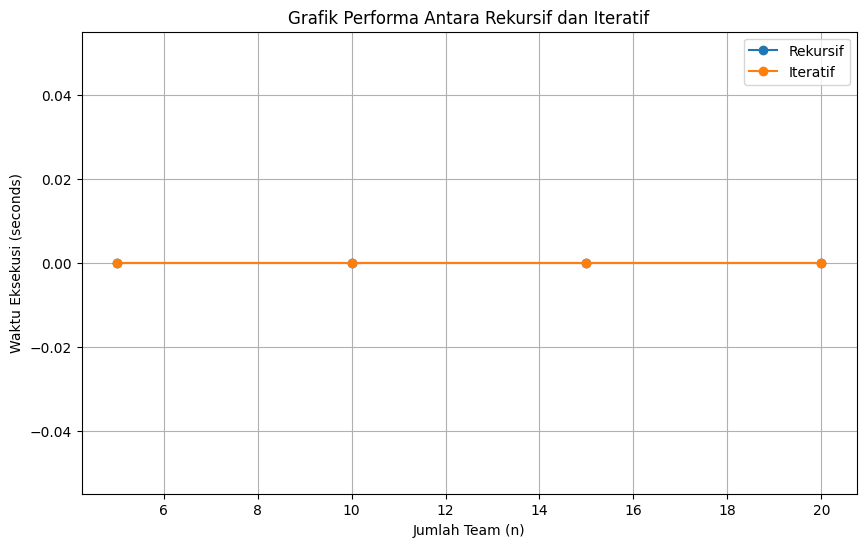

In [136]:
parsed_data = parse_data(data)

for n in [5, 10, 15, 20]:
  teams = parsed_data[:n]
  n_list.append(n)

  calculate_time(JenisSort.REKURSIF, teams.copy())
  calculate_time(JenisSort.ITERATIF, teams.copy())

create_table()
create_graph()